In [1]:
from orbitflows import HamiltonianMappingModel, generate_sho_orbits
import matplotlib.pyplot as plt
import numpy as np
import torch
from orbitflows import H, H_sho, actionAngleHarmonic, actionAngleHarmonicInverse
from orbitflows.integrate import eulerstep, rungekutta4
from time import time
from functools import partial
from tqdm import tqdm

Test case to check if RK4 does better than euler step, but this time implemented within the existing framework

In [2]:
n_actions = 1
n_angles = 100
r_min = 0.5
r_max = 1.5
omega_guess = 1
omega_correct = 1.5
ps_guess, aa_guess = generate_sho_orbits(n_actions, omega=omega_guess, t_end=10, n_steps=n_angles, r_bounds=[r_min*1.0,r_max*1.0]) 
correct_ps, correct_aa = generate_sho_orbits(n_actions, omega=omega_correct, t_end=10, n_steps=n_angles, r_bounds=[r_min,r_max])

In [3]:
def sho_potential(x, omega=omega_correct):
    return 0.5*(omega*x)**2

In [4]:
HamiltonianMappingModel(targetPotential=sho_potential, input_dim=2, hidden_dim=128, num_layers=64)

In [5]:
model = HamiltonianMappingModel(targetPotential=sho_potential, input_dim=2, hidden_dim=128, num_layers=64)
model.train(ps_guess, 0) # try to make it not train at all

0it [00:00, ?it/s]


In [6]:
model.flow(ps_guess) - ps_guess

tensor([[[0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0.

In [7]:
aa_euler = model.integrate(torch.tensor(aa_guess[0][0], requires_grad=True), 100, 10, correction = eulerstep)
aa_rk4 = model.integrate(torch.tensor(aa_guess[0][0], requires_grad=True), 100, 10, correction = rungekutta4)

/var/folders/s1/bxkg8f1501g2q16qjhch2_qw0000gn/T/ipykernel_24511/2491942190.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  aa_euler = model.integrate(torch.tensor(aa_guess[0][0], requires_grad=True), 100, 10, correction = eulerstep)



  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:04<00:00, 20.87it/s]


/var/folders/s1/bxkg8f1501g2q16qjhch2_qw0000gn/T/ipykernel_24511/2491942190.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  aa_rk4 = model.integrate(torch.tensor(aa_guess[0][0], requires_grad=True), 100, 10, correction = rungekutta4)



100%|██████████| 100/100 [00:14<00:00,  7.11it/s]


In [8]:
ps_out_euler = model.aa_to_ps(aa_euler)
ps_out_rk4 = model.aa_to_ps(aa_rk4)

In [9]:
ps_out_euler - ps_out_rk4

tensor([[ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.000

Text(0, 0.5, 'p')

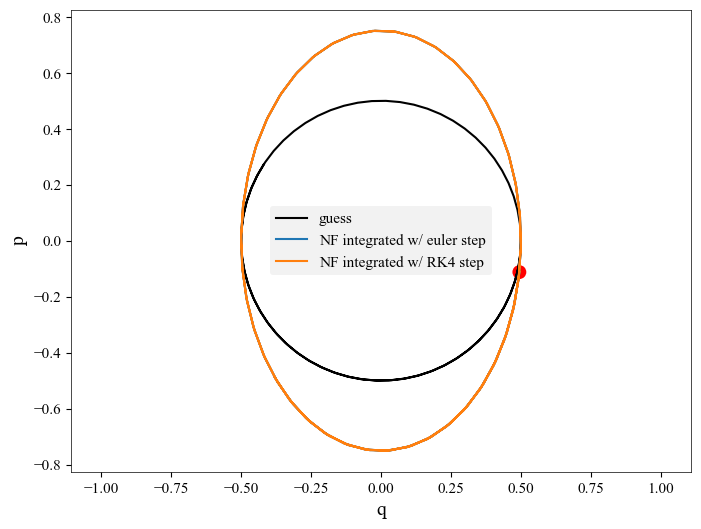

In [17]:
#plt.plot(correct_ps[0][..., 0], correct_ps[0][..., 1], label='galpy actionAngleHarmonic')
plt.plot(ps_guess[0][..., 0], ps_guess[0][..., 1], label='guess')
plt.plot(ps_out_euler[..., 0].detach(), ps_out_euler[..., 1].detach(), label='NF integrated w/ euler step')
plt.plot(ps_out_rk4[..., 0].detach(), ps_out_rk4[..., 1].detach(), label='NF integrated w/ RK4 step')
plt.scatter(ps_out_euler[..., 0].detach()[0], ps_out_euler[..., 1].detach()[0], s=100, c='red')
plt.legend()
plt.axis('equal')
plt.xlabel('q', fontsize=14)
plt.ylabel('p', fontsize=14)

In [11]:
# plt.plot(aa_euler.detach()[:,1])
# plt.plot(aa_rk4.detach()[:,1])


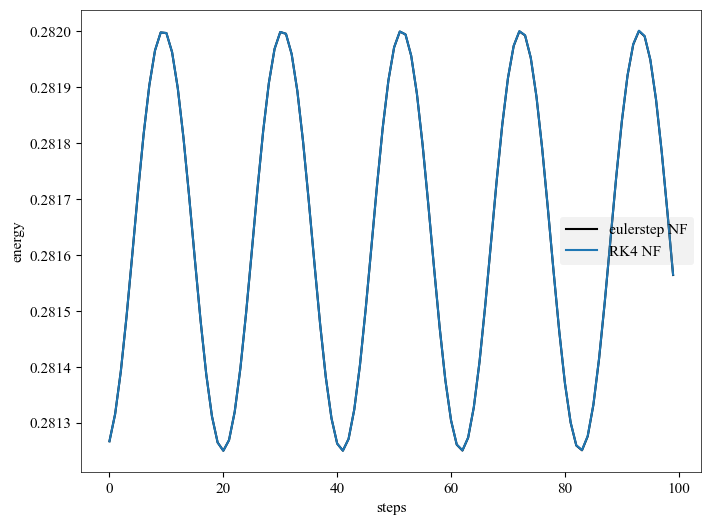

In [ ]:
plt.plot(H_sho(ps_out_euler, omega=omega_correct).detach(), label='eulerstep NF')
plt.plot(H_sho(ps_out_rk4, omega=omega_correct).detach(), label='RK4 NF')
#plt.plot(H_sho(prediction[0], omega=omega_correct).detach(), label='guess')
#plt.plot(H_sho(correct_ps[0], omega=omega_correct).detach(), label='galpy integrated')
plt.xlabel('steps', fontsize=14)
plt.ylabel('energy', fontsize=14)
plt.legend()

Text(0, 0.5, 'H$_{euler}$ - H$_{RK4}$')

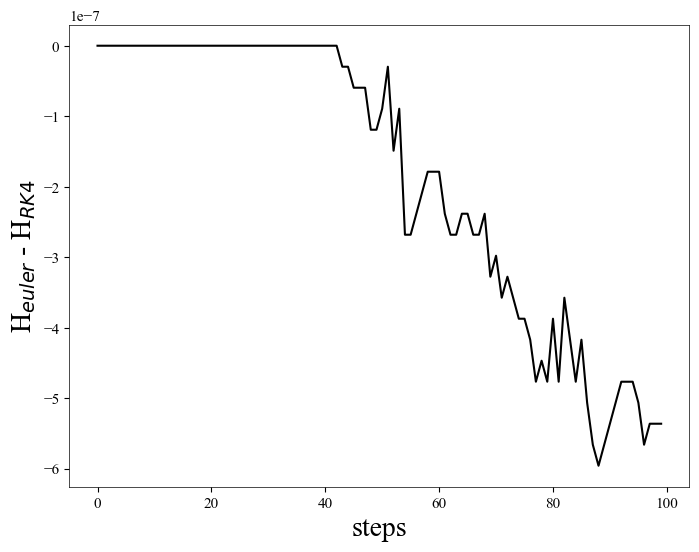

In [15]:
plt.plot((H_sho(ps_out_euler, omega=omega_correct) - H_sho(ps_out_rk4, omega=omega_correct)).detach())
plt.xlabel('steps', fontsize=20)
plt.ylabel('H$_{euler}$ - H$_{RK4}$', fontsize=20)